In [16]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import odeint

%matplotlib inline

## Fixed Parameters:

$\mu$: Forcing change in response to sea level rise (W m$^{-2}$/m)

b: Change in CO$_2$ concentration due to temperature change (ppm/K)

F$_2$: Forcing from CO$_2$ doubling

$\tau_L$: Time constant for ice sheet adjustment (kyears)

$\tau_C$: Time constant for CO$_2$ adjustment (kyears)

## Equations
\begin{eqnarray}
\tau_C\frac{dC(t)}{dt}=b T(t)-C(t) \\
\tau_L \frac{d L(t)}{dt} = F_I(t)+aT(t)-L(t)\\
T(t) = \left( \mu L(t) +F_{CO_2}\right) T_{Charney}
\end{eqnarray}

In [61]:
class Sensitivity():
    
    def __init__(self):
        """Fixed parameters"""
        self.mu = 1/40.
        self.b = 20
        self.F2 = 5.3*np.log(2)
        self.C0=230.
        self.tau_L = 10.
        self.tau_C = 3.
        self.lambda_planck = 3.2

    def vectorfield(self,w,t,p):
        """
        Arguments:
        w :  vector of the state variables:
             w = [CO2,L]
               t :  time
               p :  vector of the parameters:
                     p = [a,Tcharney]
                     a = ice/orb sens m SLR/(high lat W/m2) [0 to 200 m over a cycle]
                     
                     Tcharney = Charney sensitivity
            """

        # ODE solver parameters

        C,L = w #ANOMALIES
        a,Tcharney = p
       
        #
        F_I = lambda t: 30*np.sin(np.pi*t/40.)

        T = (self.mu*L+5.3*np.log((C+self.C0)/self.C0))*Tcharney/self.F2 #Assume temperature is in equilib with 
        f = [1/self.tau_C*(self.b*T-C),\
        1/self.tau_L*(F_I(t)+a*T-L)]


        return f
    
    def SolveDiffEq(self,params):
        """Use scipy.odeint to solve the coupled differential equations"""
        #Initial conditions
        C0=0
        L0=0

        # ODE solver parameters
        abserr = 1.0e-8
        relerr = 1.0e-6
        stoptime = 500
        numpoints = 1000

        # Create the time samples for the output of the ODE solver.
        # I use a large number of points, only because I want to make
        # a plot of the solution that looks nice.
        t = np.linspace(0,stoptime,numpoints)
        #t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
    
        p = params
        w0 = [C0,L0]
    
        wsol = odeint(self.vectorfield, w0, t, args=(p,),atol=abserr, rtol=relerr)
        return wsol
    def plot_solutions(self,a,Tcharney,cmap = cm.PRGn):
        wsol = self.SolveDiffEq([a,Tcharney])
        C = wsol[:,0]
        L = wsol[:,1]
        plt.subplot(1,3,1)
        plt.plot(C,color=cmap(.33),lw=3)
        plt.title("C")
        plt.subplot(1,3,2)
        plt.plot(L,color=cmap(.66),lw=3)
        plt.title("L")
        plt.subplot(1,3,3)
        T = (self.mu*L+5.3*np.log((C+self.C0)/self.C0))*Tcharney/self.F2
        plt.plot(T,color=cmap(.99),lw=3)
    def spiralplot(self,a,Tcharney,cmap = cm.RdYlBu):
        wsol = self.SolveDiffEq([a,Tcharney])
        C = wsol[:,0]
        L = wsol[:,1]
        T = (self.mu*L+5.3*np.log((C+self.C0)/self.C0))*Tcharney/self.F2
        nt = T.shape[0]
        FC = 5.3*np.log((C+self.C0)/self.C0)
        for i in range(nt):
            plt.plot([FC[i]],[T[i]],"o",color=cmap(i/float(nt)),mec=cmap(i/float(nt)))
        plt.xlabel("$F_{CO_2}$")
        plt.ylabel("T")
            
            

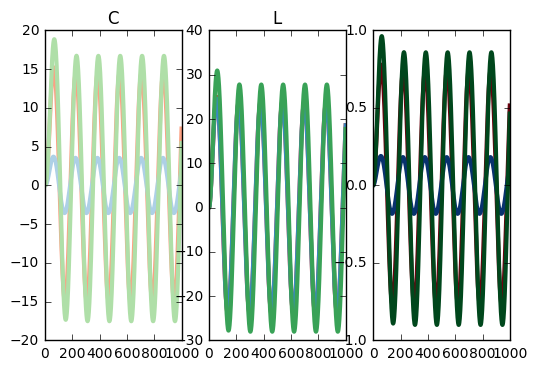

In [62]:
S = Sensitivity()
S.plot_solutions(1,3,cmap=cm.Reds)
S.plot_solutions(1,1,cmap=cm.Blues)
S.plot_solutions(10,3,cmap=cm.Greens)

In [ ]:
S.spiralplot(0,1,cmap=cm.Reds)
S.spiralplot(1,1,cmap=cm.Greens)
S.spiralplot(1,5,cmap=cm.Blues)